<a href="https://colab.research.google.com/github/KrivonosoffGS/letsgoo/blob/hometask7/hometask7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
np.array(img)

from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
digits.data.shape

images = digits.data.values.reshape(-1, 28, 28)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

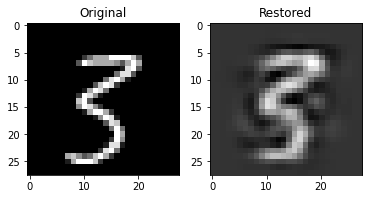

In [13]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Задача 1

Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

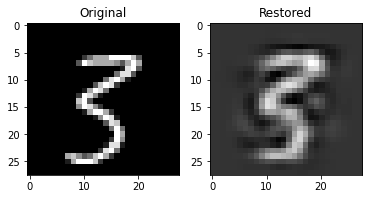

In [14]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Задача 2

Определите, сколько нужно взять главных компонент, чтобы объяснить 99%, 95%, 90%, и 85% исходной дисперсии.

In [15]:
pca = PCA()
X_transformed = pca.fit_transform(digits.data.astype(float)) 
var = pca.explained_variance_ratio_.cumsum().round(2) * 100
zeropoint100 = int(round(np.mean(np.where(var == 100))))
print(zeropoint100, 'главных компонент для 100% aka Original')
zeropoint99 = int(round(np.mean(np.where(var == 99))))
print(zeropoint99, 'главных компонент для 99%')
zeropoint95 = int(round(np.mean(np.where(var == 95))))
print(zeropoint95, 'главных компонент для 95%')
zeropoint90 = int(round(np.mean(np.where(var == 90))))
print(zeropoint90, 'главных компонент для 90%')
zeropoint85 = int(round(np.mean(np.where(var == 85))))
print(zeropoint85, 'главных компонент для 85%')

584 главных компонент для 100% aka Original
338 главных компонент для 99%
153 главных компонент для 95%
86 главных компонент для 90%
58 главных компонент для 85%


Задача 3

Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

Text(0.5, 0, '58')

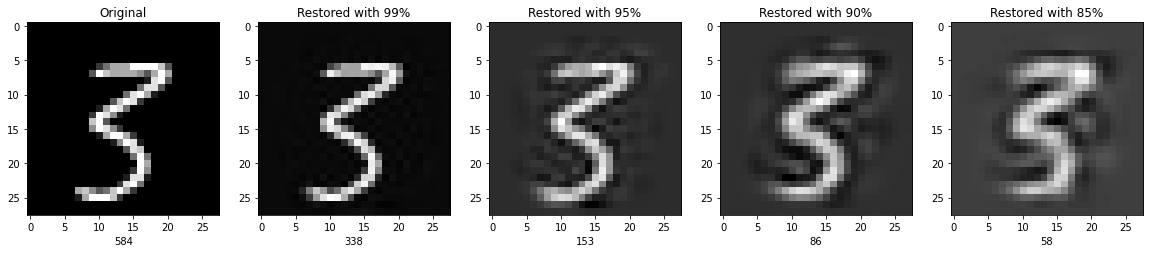

In [16]:
fig, ax = plt.subplots(1, 5,figsize=(20,20))
ax[0].imshow(images[i], cmap='gray')

pca99 = PCA(zeropoint99)
trans99 = pca99.fit_transform(digits.data.astype(float))
restored99 = pca99.inverse_transform(trans99)

pca95 = PCA(zeropoint95)
trans95 = pca95.fit_transform(digits.data.astype(float))
restored95 = pca95.inverse_transform(trans95)

pca90 = PCA(zeropoint90)
trans90 = pca90.fit_transform(digits.data.astype(float))
restored90 = pca90.inverse_transform(trans90)

pca85 = PCA(zeropoint85)
trans85 = pca85.fit_transform(digits.data.astype(float))
restored85 = pca85.inverse_transform(trans85)

ax[1].imshow(restored99[i].reshape(28, 28), cmap="gray")
ax[2].imshow(restored95[i].reshape(28, 28), cmap="gray")
ax[3].imshow(restored90[i].reshape(28, 28), cmap="gray")
ax[4].imshow(restored85[i].reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[0].set_xlabel(zeropoint100)
ax[1].set_title("Restored with 99%")
ax[1].set_xlabel(zeropoint99)
ax[2].set_title("Restored with 95%")
ax[2].set_xlabel(zeropoint95)
ax[3].set_title("Restored with 90%")
ax[3].set_xlabel(zeropoint90)
ax[4].set_title("Restored with 85%")
ax[4].set_xlabel(zeropoint85)